In [79]:
# =========================
# KATO JOSEPH BWANIKA  REG:2023-B291-11709
# =========================

#QUESTION 2.
# 2(a) Import libraries
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
# 2(b) Define Paths and Unzip Dataset
zip_path = '/content/dataset.zip'
extract_path = '/content/dataset'

# Unziped the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Here i listed all files
files = os.listdir(extract_path)
print("Extracted files:", files)


Extracted files: ['VariableDefinitions.csv', 'Test.csv', 'Train.csv', 'SampleSubmission.csv', 'StarterNotebook.ipynb', 'manifest-e268f67161c155de502276443b494f7c20250311-22142-1qdfioo.json']


In [81]:

# 2(c) Load CSV Files into DataFrames
dataframes = {}
for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(extract_path, file)
        df_name = file.replace('.csv', '')
        dataframes[df_name] = pd.read_csv(file_path)
        print(f"\nDataFrame '{df_name}' loaded successfully!")


DataFrame 'VariableDefinitions' loaded successfully!

DataFrame 'Test' loaded successfully!

DataFrame 'Train' loaded successfully!

DataFrame 'SampleSubmission' loaded successfully!


In [82]:

# 2(d) Preview First 10 Rows
for name, df in dataframes.items():
    print(f"\nFIRST 10 ROWS of '{name}':")
    print(df.head(10))



FIRST 10 ROWS of 'VariableDefinitions':
     Variable Definitions                                         Unnamed: 1
0                 country                         Country interviewee is in.
1                    year                           Year survey was done in.
2                uniqueid             Unique identifier for each interviewee
3           location_type                     Type of location: Rural, Urban
4        cellphone_access  If interviewee has access to a cellphone: Yes, No
5          household_size               Number of people living in one house
6       age_of_respondent                         The age of the interviewee
7    gender_of_respondent                Gender of interviewee: Male, Female
8  relationship_with_head  The interviewee’s relationship with the head o...
9          marital_status  The martial status of the interviewee: Married...

FIRST 10 ROWS of 'Test':
  country  year       uniqueid location_type cellphone_access  household_size  \
0   K

In [83]:
# 2(e) Dataset Information
for name, df in dataframes.items():
    print(f"\nINFO for '{name}':")
    print(df.info())


INFO for 'VariableDefinitions':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Variable Definitions  12 non-null     object
 1   Unnamed: 1            12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes
None

INFO for 'Test':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 10086 non-null  object
 1   year                    10086 non-null  int64 
 2   uniqueid                10086 non-null  object
 3   location_type           10086 non-null  object
 4   cellphone_access        10086 non-null  object
 5   household_size          10086 non-null  int64 
 6   age_of_respondent       10086 non-null  int64 
 7   gender_of_respo

In [84]:
# 2(f) Check for Missing Values
for name, df in dataframes.items():
    print(f"\nMissing values in '{name}':")
    print(df.isnull().sum())



Missing values in 'VariableDefinitions':
Variable Definitions    0
Unnamed: 1              0
dtype: int64

Missing values in 'Test':
country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

Missing values in 'Train':
country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

Missing values in 'SampleSubmission':
unique_id       0
bank_account    0
dtype: int64


In [85]:
# 2(g) Descriptive Statistics
for name, df in dataframes.items():
    print(f"\nDescriptive statistics for '{name}':")
    print(df.describe())



Descriptive statistics for 'VariableDefinitions':
       Variable Definitions                  Unnamed: 1
count                    12                          12
unique                   12                          12
top                 country  Country interviewee is in.
freq                      1                           1

Descriptive statistics for 'Test':
               year  household_size  age_of_respondent
count  10086.000000    10086.000000       10086.000000
mean    2016.975907        3.778802          38.308348
std        0.847356        2.212721          16.270053
min     2016.000000        1.000000          16.000000
25%     2016.000000        2.000000          26.000000
50%     2017.000000        3.000000          35.000000
75%     2018.000000        5.000000          48.000000
max     2018.000000       20.000000         100.000000

Descriptive statistics for 'Train':
               year  household_size  age_of_respondent
count  23524.000000    23524.000000       2352

In [86]:
# 2(h) Categorical Columns Value Counts
for name, df in dataframes.items():
    print(f"\nCategorical column value counts for '{name}':")
    for col in df.select_dtypes(include='object').columns:
        print(f"\nColumn '{col}':")
        print(df[col].value_counts())



Categorical column value counts for 'VariableDefinitions':

Column 'Variable Definitions':
Variable Definitions
country                   1
year                      1
uniqueid                  1
location_type             1
cellphone_access          1
household_size            1
age_of_respondent         1
gender_of_respondent      1
relationship_with_head    1
marital_status            1
education_level           1
job_type                  1
Name: count, dtype: int64

Column 'Unnamed: 1':
Unnamed: 1
Country interviewee is in.                                                                                                                                                                                                                        1
Year survey was done in.                                                                                                                                                                                                                          1
Uniq

In [87]:
# 2(i) Basic Data Cleaning
for name, df in dataframes.items():
    # Fill missing numeric values with mean
    num_cols = df.select_dtypes(include='number').columns
    df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

    # Fill missing categorical values with mode
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

    print(f"\nMissing values after cleaning for '{name}':")
    print(df.isnull().sum())


Missing values after cleaning for 'VariableDefinitions':
Variable Definitions    0
Unnamed: 1              0
dtype: int64

Missing values after cleaning for 'Test':
country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

Missing values after cleaning for 'Train':
country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

Missing values after cleaning for 'SampleSubmission':
unique_id

/tmp/ipython-input-4050537560.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-4050537560.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [88]:
# 2(j) Basic Visualizations
for name, df in dataframes.items():
    print(f"\nVisualizations for '{name}':")




Visualizations for 'VariableDefinitions':

Visualizations for 'Test':

Visualizations for 'Train':

Visualizations for 'SampleSubmission':


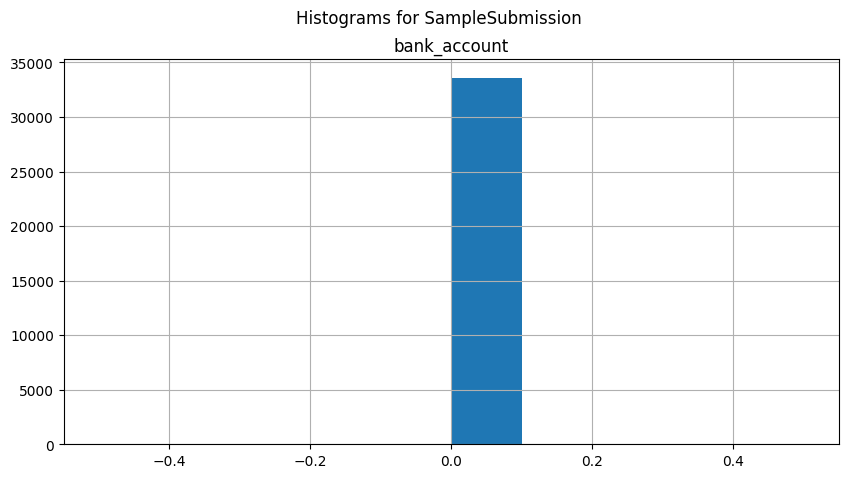

In [89]:
    # Histogram for numeric columns
    num_cols = df.select_dtypes(include='number').columns
    if len(num_cols) > 0:
        df[num_cols].hist(figsize=(10,5))
        plt.suptitle(f'Histograms for {name}')
        plt.show()

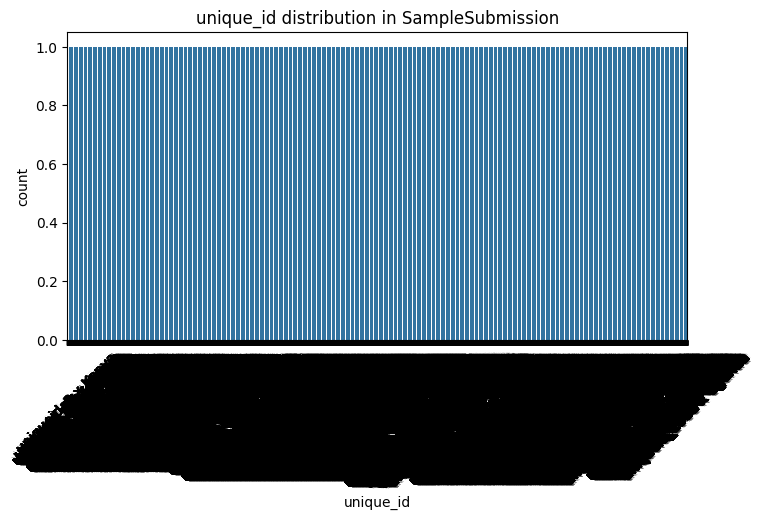


 Dataset loading, exploration, cleaning, and basic visualization completed!


In [78]:

    # Bar plots for categorical columns
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        plt.figure(figsize=(8,4))
        sns.countplot(data=df, x=col)
        plt.title(f'{col} distribution in {name}')
        plt.xticks(rotation=45)
        plt.show()

print("\n Dataset loading, exploration, cleaning, and basic visualization completed!")



 2(k) Correlation matrix for 'Test':
                       year  household_size  age_of_respondent
year               1.000000       -0.060329          -0.039450
household_size    -0.060329        1.000000          -0.117815
age_of_respondent -0.039450       -0.117815           1.000000


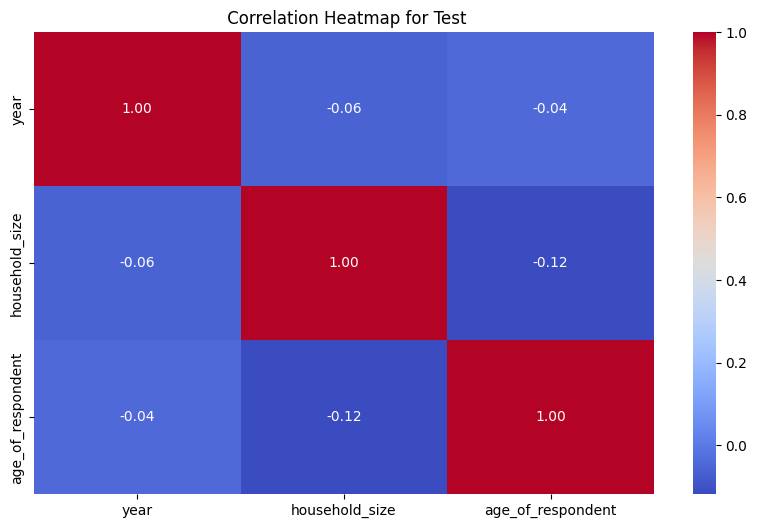


 2(k) Correlation matrix for 'Train':
                       year  household_size  age_of_respondent
year               1.000000       -0.052264          -0.019330
household_size    -0.052264        1.000000          -0.129729
age_of_respondent -0.019330       -0.129729           1.000000


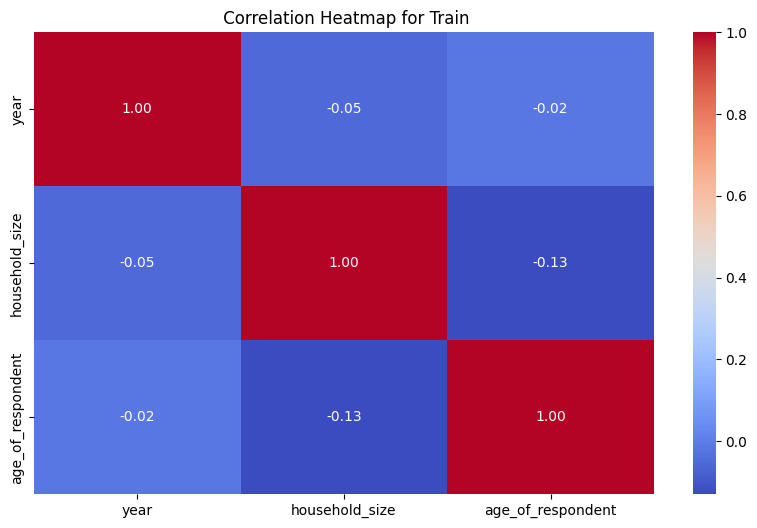

In [90]:
# 2(k) Correlation Analysis & Heatmap
# -------------------------
for name, df in dataframes.items():
    num_cols = df.select_dtypes(include='number').columns
    if len(num_cols) > 1:  # only if more than 1 numeric column
        print(f"\n 2(k) Correlation matrix for '{name}':")
        corr = df[num_cols].corr()
        print(corr)

        plt.figure(figsize=(10,6))
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title(f' Correlation Heatmap for {name}')
        plt.show()

In [92]:
#  2(l) Key Observations
for name, df in dataframes.items():
    print(f"\n 2(l) Key Observations for '{name}':")


 2(l) Key Observations for 'VariableDefinitions':

 2(l) Key Observations for 'Test':

 2(l) Key Observations for 'Train':

 2(l) Key Observations for 'SampleSubmission':


In [94]:
    # Number of rows and columns
    print(f"- Total rows: {df.shape[0]}, Total columns: {df.shape[1]}")

    # Check missing values summary
    missing = df.isnull().sum().sum()
    print(f"- Total missing values after cleaning: {missing}")

    # Most frequent categorical values
    cat_cols = df.select_dtypes(include='object').columns
    for col in cat_cols:
        most_freq = df[col].value_counts().idxmax()
        print(f"- Most frequent value in '{col}': {most_freq}")

    # Notable numeric insights
    num_cols = df.select_dtypes(include='number').columns
    if len(num_cols) > 0:
        for col in num_cols:
            print(f"- '{col}': min={df[col].min()}, max={df[col].max()}, mean={df[col].mean():.2f}")

print("\n Fully completed with loading, exploration, cleaning, visualization, correlation, and insights!")

- Total rows: 33610, Total columns: 2
- Total missing values after cleaning: 0
- Most frequent value in 'unique_id': uniqueid_3002 x Uganda
- 'bank_account': min=0, max=0, mean=0.00

 Fully completed with loading, exploration, cleaning, visualization, correlation, and insights!
